## Correlation of COVID-19 cases in the States of Mexico vs Comorbilities (Obesity, Hypertension, Diabetes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data in States

In [2]:
dfcvcases = pd.read_csv('../Data/week1analyzesStates.csv')
dfcvcases.sort_values('cve_ent',inplace=True, ascending = True)
dfcvcases.head()

,cve_ent,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,1,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,2,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,3,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,4,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,5,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778


In [3]:
dfcvcases.shape

(32, 11)

In [4]:
#dfcvcases['cve_ent'] = dfcvcases['cve_ent'].apply(lambda i: f'{i:01d}')
dfcvcases['cve_ent'] = dfcvcases['cve_ent']*1000
dfcvcases['cve_ent'] = dfcvcases['cve_ent'].apply(lambda i: f'{i:05d}')

dfcvcases

,cve_ent,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,01000,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,02000,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,03000,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,04000,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,05000,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778
5,06000,COLIMA,785153,12208,1554.856187,1043,132.840351,1210,154.110091,34,4.330366
6,07000,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388
7,08000,CHIHUAHUA,3801487,57486,1512.197727,4742,124.740661,7493,197.107079,420,11.048308
8,09000,DISTRITO FEDERAL,9018645,673666,7469.703043,33694,373.603795,34461,382.108399,675,7.484495
9,10000,DURANGO,1868996,34588,1850.619263,1238,66.238772,2495,133.494133,72,3.852336


#### Import comorbilities data in Mexico 
##### Source:[https://www.inegi.org.mx/investigacion/pohd/2018/#Tabulados]

In [5]:
dfcomorb = pd.read_excel('../Data/comorbilidades_2018.xlsx', 
                         skiprows = range(0, 2), 
                         usecols=["Identificador único del municipio", 
                                  "Clave de entidad federativa", 
                                  "Entidad federativa", 
                                  "Clave de municipio o delegación", 
                                  "Municipio o delegación", "Estimador", 
                                  "Porcentaje de población de 20 años y más con obesidad.",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de diabetes."])
#, nrows =32)
dfcomorb.head()

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
1,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Error estándar,0.640200,0.301570,0.206737
2,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite inferior de confianza,35.021848,17.888941,9.981286
3,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite superior de confianza,37.127918,18.881019,10.661392
4,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Coeficiente de variación,1.774641,1.640308,10.321339


In [6]:
dfcomorb.rename(columns={"Identificador único del municipio":"cve_ent", 
                                  "Clave de entidad federativa":"code_state", 
                                  "Entidad federativa":"state", 
                                  "Clave de municipio o delegación":"code_municip", 
                                  "Municipio o delegación":"municipalitie",
                                  "Estimador":"estimator", 
                                  "Porcentaje de población de 20 años y más con obesidad.":"pct_obesity_up20years",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.":"pct_hypertension_up20years",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.":"pct_diabetes_up20years"},
                                  inplace=True)
dfcomorb.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
1,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Error estándar,0.640200,0.301570,0.206737
2,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite inferior de confianza,35.021848,17.888941,9.981286
3,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite superior de confianza,37.127918,18.881019,10.661392
4,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Coeficiente de variación,1.774641,1.640308,10.321339


In [7]:
dfcomorb.dtypes

cve_ent                        object
code_state                    float64
state                          object
code_municip                  float64
municipalitie                  object
estimator                      object
pct_obesity_up20years         float64
pct_hypertension_up20years    float64
pct_diabetes_up20years        float64
dtype: object

In [8]:
df_value = dfcomorb['estimator'] == "Valor"
df_value.head()

0     True
1    False
2    False
3    False
4    False
Name: estimator, dtype: bool

In [9]:
dfcomorbv=dfcomorb[df_value]
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
5,01000,1.0,Aguascalientes,0.0,Total,Valor,32.593387,14.700566,7.556478
10,01001,1.0,Aguascalientes,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861
15,01002,1.0,Aguascalientes,2.0,Asientos,Valor,32.282284,15.320425,7.953634
20,01003,1.0,Aguascalientes,3.0,Calvillo,Valor,40.004293,13.751906,9.172624


In [10]:
dfcomorbv.shape

(2490, 9)

In [11]:
dfcomorbv = dfcomorbv.query("municipalitie == 'Total'").copy()
dfcomorbv.shape

(33, 9)

In [12]:
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
5,01000,1.0,Aguascalientes,0.0,Total,Valor,32.593387,14.700566,7.556478
65,02000,2.0,Baja California,0.0,Total,Valor,48.366995,21.007712,9.974848
95,03000,3.0,Baja California Sur,0.0,Total,Valor,42.849118,16.536911,8.369750
125,04000,4.0,Campeche,0.0,Total,Valor,44.903811,26.108154,14.007917


In [13]:
dfcomorbv = dfcomorbv.query("state != 'Estados Unidos Mexicanos'").copy()
dfcomorbv.shape

(32, 9)

In [14]:
dfcomorbv.sort_values('cve_ent',inplace=True, ascending = True)
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
5,01000,1.0,Aguascalientes,0.0,Total,Valor,32.593387,14.700566,7.556478
65,02000,2.0,Baja California,0.0,Total,Valor,48.366995,21.007712,9.974848
95,03000,3.0,Baja California Sur,0.0,Total,Valor,42.849118,16.536911,8.369750
125,04000,4.0,Campeche,0.0,Total,Valor,44.903811,26.108154,14.007917
185,05000,5.0,Coahuila de Zaragoza,0.0,Total,Valor,37.606715,22.397551,12.343806


In [15]:
dfcomorbv=dfcomorbv.drop(['code_state', 'state', 'code_municip','municipalitie','estimator'], axis=1).copy()
dfcomorbv.head()

,cve_ent,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
5,01000,32.593387,14.700566,7.556478
65,02000,48.366995,21.007712,9.974848
95,03000,42.849118,16.536911,8.369750
125,04000,44.903811,26.108154,14.007917
185,05000,37.606715,22.397551,12.343806


In [16]:
dfcvcases.head()

,cve_ent,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,01000,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,02000,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,03000,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,04000,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,05000,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778


#### Merge Dataframes (COVID Cases / Comorbilities)

In [17]:
dfAll = pd.merge(dfcvcases, dfcomorbv,  on='cve_ent')
dfAll

,cve_ent,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,01000,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964,32.593387,14.700566,7.556478
1,02000,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503,48.366995,21.007712,9.974848
2,03000,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704,42.849118,16.536911,8.369750
3,04000,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424,44.903811,26.108154,14.007917
4,05000,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778,37.606715,22.397551,12.343806
5,06000,COLIMA,785153,12208,1554.856187,1043,132.840351,1210,154.110091,34,4.330366,43.190110,17.222931,10.827326
6,07000,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388,28.954615,16.232804,7.790363
7,08000,CHIHUAHUA,3801487,57486,1512.197727,4742,124.740661,7493,197.107079,420,11.048308,38.667202,22.602201,9.250058
8,09000,DISTRITO FEDERAL,9018645,673666,7469.703043,33694,373.603795,34461,382.108399,675,7.484495,36.339800,20.207474,12.665536
9,10000,DURANGO,1868996,34588,1850.619263,1238,66.238772,2495,133.494133,72,3.852336,37.582702,20.249738,10.900251


<AxesSubplot:>

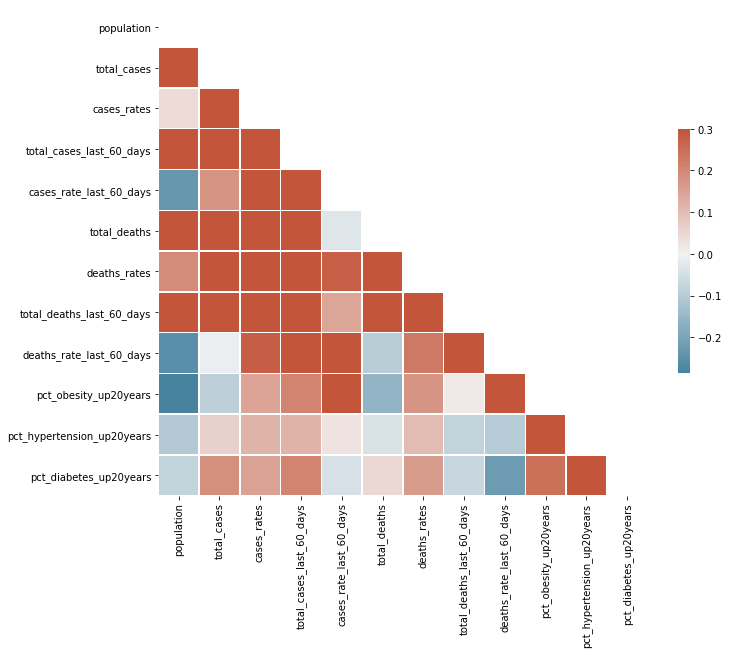

In [18]:
# Compute the correlation matrix
corr = dfAll.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
dfAll.to_csv('../Data/ComorbilitiesStates.csv', index=False)